# KNN Notebook
----
We will use Social_Network_Ads.csv dataset in this notebook.

The dataset has information on customers, and whether they bought a certain product or not.

In this notebook, we will first implement KNN from scratch, then use sklearn [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## 1. Reading Data

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## (EXTRA) To replace strings with unique integers WITHOUT OHB encoding

In [3]:
df2 = df.copy()
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df2 = df2.drop('User ID', axis='columns')
df2

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


#### I want to change values in Gender column to integers
----
ASSUMING we don't know the unique values in this column.

In [5]:
unique_values = pd.unique(df2['Gender'])
print(unique_values)
i = 0
for value in unique_values:
    df2['Gender'] = df2['Gender'].replace(value, i)
    i += 1

df2

['Male' 'Female']


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


## 2. Split Data

In [6]:
X = df.loc[:, 'Age':'EstimatedSalary']
y = df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train = y_train.values
y_test = y_test.values

(300, 2) (300,)
(100, 2) (100,)


In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## 3. Model Building

### 3.1. From Scratch

In [9]:
def eucledian(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

To get the most votes from a classes array, we can use [mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function from scipy library.

In [10]:
from scipy.stats import mode

In [13]:
y_pred = []
K = 3

for x in X_test:
    points_distances = []
    
    for xx in X_train:
        distance = eucledian(xx, x)
        points_distances.append(distance)
        
    #print(points_distances)
    indices = np.argpartition(points_distances, K)[:K]
    labels = y_train[indices]
    label = mode(labels)[0][0]
    y_pred.append(label)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print('For K = %d, accuracy = %.2f%%\n' % (K, accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
print(cm)

For K = 3, accuracy = 93.00%

[[64  4]
 [ 3 29]]


### 3.2. Using Sklearn 

In [13]:
# we will test using k from 1 to 25
scores = {}
for k in range(1, 26):
    knn = KNN(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)

In [14]:
best_K = 0
best_acc = 0
for k in scores:
    print('For K = %d, accuracy = %.2f%%' % (k, scores[k] * 100))
    if scores[k] > best_acc:
        best_acc = scores[k]
        best_K = k

For K = 1, accuracy = 87.00%
For K = 2, accuracy = 90.00%
For K = 3, accuracy = 93.00%
For K = 4, accuracy = 92.00%
For K = 5, accuracy = 93.00%
For K = 6, accuracy = 93.00%
For K = 7, accuracy = 93.00%
For K = 8, accuracy = 93.00%
For K = 9, accuracy = 93.00%
For K = 10, accuracy = 93.00%
For K = 11, accuracy = 93.00%
For K = 12, accuracy = 93.00%
For K = 13, accuracy = 93.00%
For K = 14, accuracy = 93.00%
For K = 15, accuracy = 93.00%
For K = 16, accuracy = 93.00%
For K = 17, accuracy = 93.00%
For K = 18, accuracy = 93.00%
For K = 19, accuracy = 93.00%
For K = 20, accuracy = 93.00%
For K = 21, accuracy = 93.00%
For K = 22, accuracy = 93.00%
For K = 23, accuracy = 93.00%
For K = 24, accuracy = 93.00%
For K = 25, accuracy = 93.00%


In [15]:
best_K

3

In [16]:
knn = KNN(n_neighbors=best_K)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


## 4. (EXTRA) Visualize the KNN Function

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


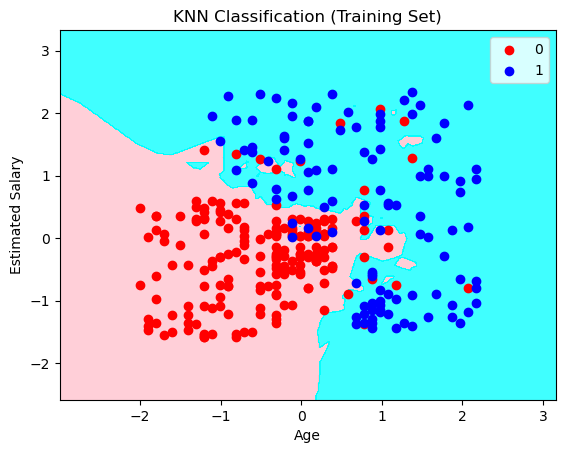

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('KNN Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


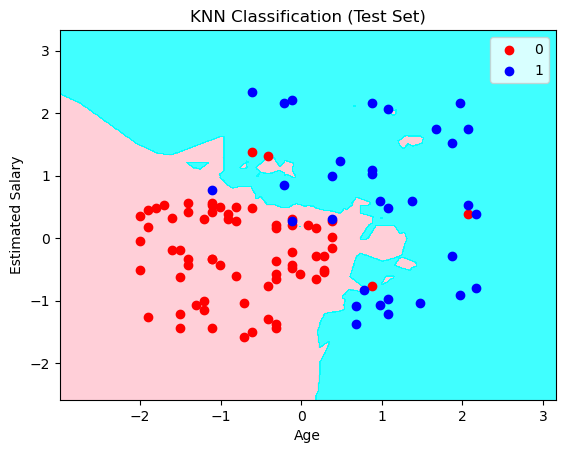

In [19]:
X_set, y_set= X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 

plt.title('KNN Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()